# A test of the joint torque redistribution hypothesis

**Subjects at a range of speeds**

> [Laboratory of Biomechanics and Motor Control](http://pesquisa.ufabc.edu.br/bmclab/)  
> Federal University of ABC, Brazil

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Python-setup" data-toc-modified-id="Python-setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Python setup</a></span><ul class="toc-item"><li><span><a href="#Environment" data-toc-modified-id="Environment-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Environment</a></span></li><li><span><a href="#Helping-functions" data-toc-modified-id="Helping-functions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Helping functions</a></span></li></ul></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#Data-selection" data-toc-modified-id="Data-selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data selection</a></span><ul class="toc-item"><li><span><a href="#Subjects-in-two-age-categories:-Young-(18-$\leq$-years-$\leq$-40-)-and-Older-($\geq$-55-years)-adults" data-toc-modified-id="Subjects-in-two-age-categories:-Young-(18-$\leq$-years-$\leq$-40-)-and-Older-($\geq$-55-years)-adults-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Subjects in two age categories: Young (18 $\leq$ years $\leq$ 40 ) and Older ($\geq$ 55 years) adults</a></span></li></ul></li><li><span><a href="#Basic-characteristics-and-age-group-comparison" data-toc-modified-id="Basic-characteristics-and-age-group-comparison-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Basic characteristics and age-group comparison</a></span></li><li><span><a href="#Data-normalization-(non-dimensional-units)" data-toc-modified-id="Data-normalization-(non-dimensional-units)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data normalization (non-dimensional units)</a></span></li><li><span><a href="#Linear-regression-models" data-toc-modified-id="Linear-regression-models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Linear regression models</a></span><ul class="toc-item"><li><span><a href="#Speed" data-toc-modified-id="Speed-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Speed</a></span></li><li><span><a href="#StepLength" data-toc-modified-id="StepLength-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>StepLength</a></span></li><li><span><a href="#Cadence" data-toc-modified-id="Cadence-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Cadence</a></span></li><li><span><a href="#A-linear-mixed-effects-regression-model" data-toc-modified-id="A-linear-mixed-effects-regression-model-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>A linear mixed-effects regression model</a></span></li><li><span><a href="#Data-standardization" data-toc-modified-id="Data-standardization-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Data standardization</a></span><ul class="toc-item"><li><span><a href="#Replace-letters-by-numeric-values-because-it's-easier-to-identify-the-effect" data-toc-modified-id="Replace-letters-by-numeric-values-because-it's-easier-to-identify-the-effect-7.5.1"><span class="toc-item-num">7.5.1&nbsp;&nbsp;</span>Replace letters by numeric values because it's easier to identify the effect</a></span></li></ul></li><li><span><a href="#Run-regression-models" data-toc-modified-id="Run-regression-models-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Run regression models</a></span><ul class="toc-item"><li><span><a href="#Table-with-model-results" data-toc-modified-id="Table-with-model-results-7.6.1"><span class="toc-item-num">7.6.1&nbsp;&nbsp;</span>Table with model results</a></span></li></ul></li><li><span><a href="#Confidence-intervals-for-the-mean-by-bootstrap" data-toc-modified-id="Confidence-intervals-for-the-mean-by-bootstrap-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>Confidence intervals for the mean by bootstrap</a></span></li><li><span><a href="#Results-are-similar-with-dimensional-data" data-toc-modified-id="Results-are-similar-with-dimensional-data-7.8"><span class="toc-item-num">7.8&nbsp;&nbsp;</span>Results are similar with dimensional data</a></span></li></ul></li><li><span><a href="#Two-dimensional-plots-combined:-Step-Length-and-Cadence-versus-Speed" data-toc-modified-id="Two-dimensional-plots-combined:-Step-Length-and-Cadence-versus-Speed-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Two-dimensional plots combined: Step Length and Cadence versus Speed</a></span></li><li><span><a href="#Three-dimensional-plots:-Step-Length-and-Speed-versus-H2A-features" data-toc-modified-id="Three-dimensional-plots:-Step-Length-and-Speed-versus-H2A-features-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Three-dimensional plots: Step Length and Speed versus H2A features</a></span></li><li><span><a href="#References" data-toc-modified-id="References-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Introduction

This notebook reports an investigation on the effects of speed on step length and cadence.

The experimental data are taken from an open dataset (Fukuchi et al., 2018). This dataset contains raw and processed data from standard 3d gait analysis of healthy volunteers walking in both overground and treadmill in a range of speeds. 

## Python setup

In [1]:
from pathlib import Path
import pickle
import numpy as np
import scipy as sp
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms
import pingouin as pg
from tqdm.notebook import tqdm
%load_ext watermark  

### Environment

In [2]:
pio.templates.default = 'gridon'
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.1)
# colors
#colors = sns.color_palette()
colors = plotly.colors.DEFAULT_PLOTLY_COLORS
#colors2 = [tuple(np.fromstring(c[4:-1], sep=',')/255) for c in colors]
#sns.set_palette(sns.color_palette(colors2))  # make seaborn use plotly colors
#palette = sns.color_palette(palette='Set1')  # tab10
#palette[0], palette[1] = palette[1], palette[0]
#sns.set_palette(palette=palette)
pd.set_option('precision', 3)  # number of decimal places for the environment

# parameters
path2 = Path(r'./')
# file with discrete variables calculated by 'Walking speed torque  .ipynb'
filename = path2 / 'wbdsRedist_clean3.csv'
# number of bootstraps to be performed
n_boots = 1000
# significance level
alpha = 0.05
# dictionary to store data and save
data_dict = dict()

%watermark
%watermark --iversions

Last updated: 2021-08-19T00:20:04.833456-03:00

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.26.0

Compiler    : GCC 9.3.0
OS          : Linux
Release     : 5.11.0-31-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit

matplotlib : 3.4.3
pingouin   : 0.4.0
seaborn    : 0.11.2
numpy      : 1.21.2
autopep8   : 1.5.6
statsmodels: 0.12.2
plotly     : 5.2.1
json       : 2.0.9
scipy      : 1.7.1
pandas     : 1.3.2



### Helping functions

In [3]:
def ttest(df, feature, group, levels=None, alpha=alpha):
    """t-test statistcs for dataframe columns using the pingouin library.
    """
    stats = pd.DataFrame()
    if levels is None:
        levels = df[group].unique()
    if len(levels) != 2:
        raise Exception('Incorrect number of levels: {}'.format(len(levels)))
    for f in feature:
        x = df[df[group] == levels[0]][f]
        y = df[df[group] == levels[1]][f]
        stat = pg.ttest(x, y, confidence=1-alpha)
        stat.index = [f]
        diff = np.round(100 * (np.mean(x) - np.mean(y)) / np.mean(y), 0)
        diff = pd.DataFrame(data=diff, index=[f], columns=['%diff'], dtype=int)
        stat = pd.concat([stat, diff], axis=1)
        stats = pd.concat([stats, stat], axis=0)
    stats.drop(columns=['alternative', 'BF10', 'power'], inplace=True)
    stats.index.name = '{}-{}'.format(*levels)
    display(stats.style.format({'p-val': '{:.3f}'}).apply(sig_red, subset='p-val', axis=1))
    return stats


def normtest(df, feature, group, alpha=alpha):
    """Normality test for dataframe columns using the pingouin library.
    """
    levels = df[group].unique()
    for level in levels:
        test = pg.normality(df[df[group] == level][feature], method='normaltest')
        test.index.name = level
        display(test.style.format({'pval': '{:.3f}'}).apply(sig_red, axis=1))


def normality(df):
    """Get the p-val of the normality test using the pingouin library.
    """
    return pg.normality(df)['pval']


def describe(df, feature, group, stat=['count', 'mean', 'std', 'min', 'max', normality]):
    """Descriptive statistics for dataframe columns.
    """
    col = [('Young', 'normality'), ('Older', 'normality')]
    x = df.groupby(group)[feature].agg(stat).stack().transpose().style.apply(sig_red, subset=col)
    display(x)
    return x


def sig_red(col, alpha=alpha):
    """Returns string 'color: red' for `col` < `alpha`, black otherwise.
    """
    col = np.array([(float(x[1:]) if isinstance(x, str) else float(x))
                    if len(str(x)) else np.nan for x in col])
    
    is_sig = col < alpha
    return ['color: red' if x else 'color: black' for x in is_sig]


def regression(fit_ml, fit_re, names):
    """Get results from linear regression as list.

    results = ['Response', 'Coef', 'CI', 'p', 'Coef', 'CI', 'p', Coef', 'CI', 'p',
               'llf', 'AIC', 'R2']
    """
    # print(fit_re.model.exog_names)
    if names is None:
        names = fit_re.model.exog_names[1:]
    results = [np.nan]*(1 + len(names)*3 + 3)
    # response
    results[ 0] = fit_re.model.endog_names
    # log-likelihood function
    results[-3] = '{:.1f}'.format(fit_ml.llf)
    # Akaike information criterion
    results[-2] = '{:.1f}'.format(fit_ml.aic)
    # marginal R2, proportion of variance explained by the fixed factor(s) alone
    results[-1] = '{:.2f}'.format(np.corrcoef(fit_re.model.endog, fit_re.predict())[0, 1]**2)
    # conditional R2, proportion of variance explained by both the fixed and random factors
    #results[-1] = np.round(np.corrcoef(fit_re.model.endog , fit_re.fittedvalues)[0, 1]**2, 2)
    for name in fit_re.model.exog_names[1:]:
        idx = names.index(name)
        # fitted fixed-effects coefficients
        results[3*idx+1] = '{:.2f}'.format(fit_re.params[name])
        # confidence interval for the fitted parameters
        ci = fit_re.conf_int().loc[name].values
        results[3*idx+2] = '[{:.2f}, {:.2f}]'.format(ci[0], ci[1])
        # two-tailed p values for the t-stats of the params
        if fit_re.pvalues[name] < 0.0001:
            results[3*idx+3] = '< 0.0001'
        else:
            results[3*idx+3] = '{:.4f}'.format(fit_re.pvalues[name])

    return results


def runmodels(data, predictors, responses, groups, names, mixed=True, show=True):
    """Run OLS or mixed linear regression models.
    """
    fit_ml = []
    fit_re = []
    models = []
    i = 0
    print('Running regression models...')
    for response in responses:
        for predictor in predictors:
            eq = '{} ~ {}'.format(response, predictor)
            print(response, predictor)
            if mixed:
                md = smf.mixedlm(formula=eq, data=data, groups=groups)  
            else:
                md = smf.ols(formula=eq, data=data)
            # use ML method to estimate AIC and llf
            fit_ml.append(md.fit(reml=False))
            # use REML method to get unbiased estimations of the coefficients
            fit_re.append(md.fit(reml=True))
            models.append(regression(fit_ml[-1], fit_re[-1], names=names))
            if mixed:
                text = 'converged' if fit_re[-1].converged else 'didn\'t converge'
            if show:
                if mixed:
                    print('Model {:2}: {} {}.'.format(i, eq, text))
                else:
                    print('Model {:2}: {}.'.format(i, eq))
                #display(fit_re[-1].summary())
            i += 1
    if show:
        print('...done.')
    
    return models, fit_ml, fit_re


def display_table(models, names, del_name_idx=None, filename=None):
    """Display rich table with stats from regression models.
    """
    h0, h1, h2 = ['Feature'], ['Feature'], ['Feature']
    h0.extend(['Predictor']*3*len(names))
    for name in names:
        h1.extend(name*3)
    h2.extend(['Coef', 'CI', 'p-value']*len(names))
    h0.extend(['LLF', 'AIC', 'R2'])
    h1.extend(['LLF', 'AIC', 'R2'])
    h2.extend(['LLF', 'AIC', 'R2'])
    table = pd.DataFrame(data=models)
    table.columns=[h0, h1, h2]
    table.replace({np.nan: ''}, inplace=True)
    if del_name_idx is not None:
        for col in del_name_idx:
            table = table.drop(columns=names[col], level=1)
    if filename is not None:
        table.to_csv(path2 / filename, sep='\t', index=False)
    table = table.style \
            .apply(sig_red, subset=[c for c in table.columns if c[-1] == 'p-value']) \
            .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
    
    return table


def plot_residuals(fit=None, residuals=None, kind='marginal', x=None,
                   xlabel=None, ylabel=None, alpha=0.05, hover=None):
    """Scater plot, histogram and Q-Q plot for testing residuals.
    
    This function generates three subplots (1x3):
    1. Scatter plot of the residuals versus predictor variables.
    2. Histogram of the residuals and the expected normal function.
    3. Q-Q plot.
    
    On the third plot are also shown the statistic and p-value of the
    Shapiro-Wilk test for normality. These values are also returned as output
    of the function.
    
    Parameters
    ----------
    fit: statsmodels regression results or None, optional (default=None)
        `fit` is a mod.fit() structure
        See https://www.statsmodels.org/stable/regression.html
        The residuals and predictor values are taken from this parameter.
    
    residuals: 1-D array_like or None, optional (default=None)
        The residuals to test the normality. Enter this parameter only if
        `fit` is not inputed.
        
    kind: {'marginal', 'conditional'}, optional (default='marginal')
        Which kind of residuals to test (only if `fit` is inputed).
        'marginal': residuals from fixed effects
        'conditional': residuals from fixed and random effects
    
    x: 1-D array_like or None, optional (default=None)
        The predictor values.
    
    xlabel: string or None, optional (default=None)
        The predictor label.
    
    ylabel: string or None, optional (default=None)
        The response label.
    
    alpha: float, optional (default=0.05)
        The significance level
        
    hover: tuple (string, 1-D array_like) or None, optional (default=None)
        Information to show when hovering the data in the first plot.
        See the examples.
    
    
    Returns
    -------
    statistic: float
        The statistic of the Shapiro-Wilk test for normality.
    p-value: float
        The p-value of the null-hypothesis test for normality.
        
    Notes
    -----
    https://www.statsmodels.org/stable/_modules/statsmodels/regression/mixed_linear_model.html
    fit.model.fit().predict() or fit.predict() only reflect 
     fixed effects mean structure of the model.
    fit.model.fit().fittedvalues or fit.fittedvalues reflect the mean
     structure specified by fixed effects and predicted random effects.
    
    Examples
    --------
    >>> residuals = np.random.normal(loc=0.0, scale=1.0, size=1000)
    >>> plot_residuals(residuals=residuals)
    >>> residuals = np.random.lognormal(mean=1.0, sigma=0.5, size=100)
    >>> plot_residuals(residuals=residuals, xlabel= 'X', ylabel='Y')
    >>> residuals = np.random.lognormal(mean=1.0, sigma=0.5, size=10)
    >>> plot_residuals(residuals=residuals, hover=('Datum', np.arange(10)))
    """
    
    import numpy as np
    import scipy as sp
    import plotly
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go
    import plotly.figure_factory as ff
    
    if fit is not None:
        # fit.model.fit().predict() or fit.predict() only reflect 
        #  fixed effects mean structure of the model.
        # fit.model.fit().fittedvalues or fit.fittedvalues reflect the mean
        #  structure specified by fixed effects and predicted random effects.
        if kind == 'marginal':
            residuals = fit.model.endog - fit.model.fit().predict() 
        elif kind == 'conditional':
            residuals = fit.model.endog - fit.model.fit().fittedvalues 
        else:
            raise ValueError("Valid options for 'kind': 'marginal' or 'conditional'.")
        x = fit.model.exog[:, 1]
    else:
        if residuals is None:
            raise ValueError('If fit is None, residuals cannot be None.')
        if x is None:
            x = np.arange(0, len(residuals))
    if xlabel is None:
        xlabel = 'Predictor'
    if ylabel is None:
        ylabel = 'Response'

    # normality of residuals test
    W, p = sp.stats.shapiro(residuals)  # Shapiro-Wilk test
    if p < 0.001:
        p_str = 'p < 0.001'
    else:
        p_str = 'p = {:.3f}'.format(p)
    # plots
    fig = make_subplots(rows=1, cols=3, horizontal_spacing=0.1,
                        subplot_titles=('Scatter plot', 'Histogram', 'Q-Q plot'))
    # scatter plot
    if hover is not None:
        label, data = hover[0], hover[1]
        template = ['<b>{}: '.format(label) + '%{customdata}</b> <br>' +
                    '{}: '.format(xlabel) + '%{x} <br>Residual: %{y} ']
        fig.add_trace(go.Scatter(x=x, y=residuals, mode='markers',
                                 marker=dict(color='blue'),
                                 customdata=data,
                                 hovertemplate=template[0],
                                 name=''),
                      row=1, col=1)        
    else:
        fig.add_trace(go.Scatter(x=x, y=residuals, mode='markers', name='',
                                 marker=dict(color='blue')), row=1, col=1)
    if min(residuals)<=0 and max(residuals)>=0:
        fig.add_hline(y=0, line=dict(width=2, color='rgba(0,0,0,.5)'), row=1, col=1)
    # histogram
    fig.add_trace(go.Histogram(x=residuals, marker_color='blue', name='',
                               histnorm='probability density'), row=1, col=2)
    norm = ff.create_distplot([residuals], group_labels=[''],
                              curve_type='normal', show_rug=False).data[1]
    fig.add_trace(go.Scatter(x=norm['x'], y=norm['y'], mode = 'lines', name='',
                             line=dict(width=3, color='red')), row=1, col=2)  
    # Q-Q plot
    qq = sp.stats.probplot(residuals, dist='norm')
    qqx = np.array([qq[0][0][0], qq[0][0][-1]])
    fig.add_trace(go.Scatter(x=qq[0][0], y=qq[0][1], mode='markers', name='',
                             marker=dict(color='blue')), row=1, col=3)
    fig.add_trace(go.Scatter(x=qqx, y=qq[1][1] + qq[1][0]*qqx, mode='lines', name='',
                             line=dict(width=3, color='red')), row=1, col=3) 
    fig.add_annotation(text='W = {:.2f}<br>{}'.format(W, p_str),
                       xref='x domain', yref='y domain', align='left', valign='top',
                       x=0.02, y=0.98, showarrow=False, row=1, col=3)        
    # x and y axes properties
    fig.update_xaxes(title_text=xlabel, row=1, col=1)
    fig.update_xaxes(title_text='Residuals', row=1, col=2)
    fig.update_xaxes(title_text='Normal theoretical quantiles', row=1, col=3)
    fig.update_yaxes(title_text='Residuals', row=1, col=1)
    fig.update_yaxes(title_text='Probability density', row=1, col=2)
    fig.update_yaxes(title_text='Observed data quantiles', row=1, col=3)

    text='Normality tests for residuals of {} &times; {}'.format(ylabel, xlabel)
    fig.update_layout(showlegend=False, height=400, font_color='black',
                      title=dict(text=text, x=.5, xanchor='center', yanchor='top',
                                 font=dict(size=20)))
    fig.show()
    print(['We {}reject the null hypothesis that the residuals come from a population' +
           ' with normal distribution\n(Shapiro-Wilk test: W({}) = {:.2f}, {}).'
          ][0].format('failed to ' if p>alpha else '', len(x), W, p_str))
    
    return W, p

   
def bootstrap(df, df2, response, predictor, groups, n_boots=1000):
    """Bootstrap observations for parameter estimation of linear mixed effects model.
    """
    y_boot = np.zeros((df2.shape[0], n_boots))
    eq = '{} ~ {}'.format(response, predictor)
    for i in tqdm(range(n_boots)):
        y_boot[:, i] = smf.mixedlm(formula=eq,
                                   groups=groups,
                                   data=df.sample(n=df.shape[0], replace=True)
                                  ).fit().predict(df2)
    return y_boot


## Read data

In [4]:
df = pd.read_csv(filename)
df.drop(columns=['SpeedRaw', 'Subject.1', 'StepTime'], inplace=True)  # unused columns
# Height cm to meters and stride to step length
df['Height'] = df['Height']/100
df['StepLength'] = df['StepLength']/2
# Append BMI and Froude number for gait speed
df = df.assign(BMI = df['Mass']/df['Height']**2)
df = df.assign(SpeedFroude = df['Speed'].values/np.sqrt((9.81*df['LegLength'].values)))
# rename columns
df.rename(columns={'SpeedCategory':'SpeedCat', 
                   'PeakHipMom':'Hip_M', 'PeakKneeMom': 'Knee_M',
                   'PeakAnkleMom': 'Ankle_M', 'Hip2AnkleRatio': 'H2A_M',
                   'hipEXTimp': 'Hip_Iext', 'hipFLXimp': 'Hip_Iflx',
                   'kneeEXTimp': 'Knee_Iext', 'ankleEXTimp': 'Ankle_Iext',
                   'hip2ankleRatioImp': 'H2A_I', 'hipPOSwork': 'Hip_Wpos',
                   'hipNEGwork': 'Hip_Wneg', 'kneePOSwork': 'Knee_Wpos',
                   'kneeNEGwork': 'Knee_Wneg', 'anklePOSwork': 'Ankle_Wpos',
                   'ankleNEGwork': 'Ankle_Wneg', 'hip2ankleRatioWork': 'H2A_W'},
          inplace=True)
# comfortable speed as a new variable (column)        
df = df.assign(SpeedComf = df.Speed)
for s in df['Subject'].unique():
    df.at[df['Subject']==s, 'SpeedComf'] = df[(df['Subject']==s) &
                                              (df['SpeedCat']=='V5')]['Speed'].values[0]  
# reorder and drop some columns
df = df[['Subject', 'AgeGroup', 'Gender', 'Age', 'Height', 'Mass', 'BMI', 'LegLength',
         'SpeedCat', 'SpeedComf', 'Speed', 'StepLength', 'Cadence',
         'H2A_M', 'H2A_I', 'H2A_W']]
df

Subject AgeGroup Gender  Age  Height   Mass     BMI  LegLength SpeedCat  \
0          1    Young      M   25   1.725  74.30  24.970       0.89       V1   
1          1    Young      M   25   1.725  74.30  24.970       0.89       V2   
2          1    Young      M   25   1.725  74.30  24.970       0.89       V3   
3          1    Young      M   25   1.725  74.30  24.970       0.89       V4   
4          1    Young      M   25   1.725  74.30  24.970       0.89       V5   
..       ...      ...    ...  ...     ...    ...     ...        ...      ...   
289       49    Older      F   73   1.610  84.85  32.734       0.80       V2   
290       49    Older      F   73   1.610  84.85  32.734       0.80       V3   
291       49    Older      F   73   1.610  84.85  32.734       0.80       V4   
292       49    Older      F   73   1.610  84.85  32.734       0.80       V5   
293       49    Older      F   73   1.610  84.85  32.734       0.80       V6   

     SpeedComf  Speed  StepLength  Cadence  H2A_M  H2A_I  H2A_W  
0         1.21   0.49       0.434   67.797  0.453  0.387  1.370  
1         1.21   0.67       0.505   80.990  0.393  0.342  2.419  
2         1.21   0.85       0.593   86.747  0.475  0.332  2.189  
3         1.21   1.03       0.623   99.723  0.557  0.381  1.534  
4         1.21   1.21       0.647  112.500  0.601  0.369  1.679  
..         ...    ...         ...      ...    ...    ...    ...  
289       0.84   0.46       0.390   71.146  0.497  0.481  2.757  
290       0.84   0.59       0.430   81.818  0.499  0.444  2.079  
291       0.84   0.71       0.467   91.603  0.497  0.425  3.070  
292       0.84   0.84       0.509   98.630  0.543  0.434  2.412  
293       0.84   0.97       0.538  108.434  0.625  0.456  1.934  

[294 rows x 16 columns]

## Data selection

### Subjects in two age categories: Young (18 $\leq$ years $\leq$ 40 ) and Older ($\geq$ 55 years) adults

In [5]:
df = df.drop(index=df[(df.Age > 40) & (df.Age < 55)].index, inplace=False)
df.reset_index(drop=True, inplace=True)

display(df.drop_duplicates(subset='Subject', inplace=False)[
        ['Subject', 'AgeGroup']].groupby(['AgeGroup']).count().T)
display(df.drop_duplicates(subset='Subject', inplace=False)[
        ['Subject', 'AgeGroup', 'Gender']].groupby(['AgeGroup', 'Gender']).count().T)
# number of subjects in each group
Ny, No = df.drop_duplicates(subset='Subject')[['Subject', 'AgeGroup']
                                             ].groupby(['AgeGroup']).count().values

AgeGroup  Older  Young
Subject      25     23

AgeGroup Older     Young    
Gender       F   M     F   M
Subject     11  14     9  14

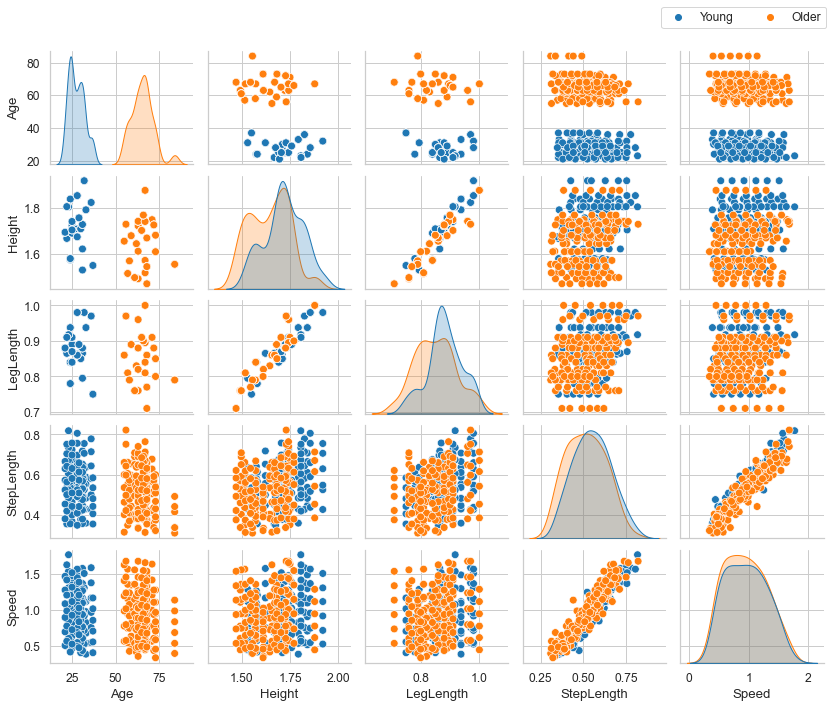

In [6]:
grid = sns.pairplot(df,
                    vars=['Age', 'Height', 'LegLength', 'StepLength', 'Speed'],
                    diag_kind='auto', hue='AgeGroup', plot_kws={'s':60},
                    height=2, aspect=1.1)
handles = grid._legend_data.values()
labels = grid._legend_data.keys()
grid._legend.remove()
grid.fig.legend(handles=handles, labels=labels, loc='upper right', ncol=2,
             bbox_to_anchor=(1, 1.02), bbox_transform=plt.gcf().transFigure)
grid.fig.subplots_adjust(left=.1, right=.99, bottom = 0.1, top=.95, hspace=.1, wspace=.1)
grid.fig.align_ylabels(grid.axes[:, 0])
plt.show()

In [7]:
fig = px.scatter(df, x='Subject', y='Speed', color='AgeGroup',
                 hover_data=['LegLength', 'Cadence', 'StepLength'],
                 labels={'Speed': 'Speed [m/s]', 'Subject': 'Subject #'},
                 range_x=[0, df.Subject.max()+1],
                 title='Walking speeds of the subjects')
fig.show()

## Basic characteristics and age-group comparison 

In [8]:
var = ['Age', 'Height', 'Mass', 'BMI', 'LegLength', 'SpeedComf']
describe(df.drop_duplicates(subset='Subject'), feature=var, group='AgeGroup');

In [9]:
stats = ttest(df.drop_duplicates(subset='Subject'), var, 'AgeGroup',
              levels=['Older', 'Young'], alpha=alpha)

## Data normalization (non-dimensional units)

The Older group is, on average, significantly smaller than the Young group; but this difference did not reach significance for leg length. Considering the intra- and intergroup variability of the subjects' height, and its known effect on the variables of gait biomechanics, we will normalize the variables to make them dimensionless.

In [10]:
df_d = df.copy(deep=True)  # store dimensional data
g = 9.81  # gravity acceleration, m/s2
df.loc[:, 'StepLength'] = df.loc[:, 'StepLength'] / df.loc[:, 'LegLength']
df.loc[:, 'Speed']      = df.loc[:, 'Speed']      / np.sqrt(g * df.loc[:, 'LegLength'])
df.loc[:, 'SpeedComf']  = df.loc[:, 'SpeedComf']  / np.sqrt(g * df.loc[:, 'LegLength'])
df.loc[:, 'Cadence']    = df.loc[:, 'Cadence']    / (np.sqrt(g / df.loc[:, 'LegLength']) * 60)

In [11]:
fig = px.scatter(df, x='Subject', y='Speed', color='AgeGroup',
                 hover_data=['LegLength', 'Cadence', 'StepLength', 'SpeedComf'],
                 labels={'Speed': 'Speed [non-dimensional]', 'Subject': 'Subject #'},
                 range_x=[0, df.Subject.max()+1],
                 title='Walking speeds (non-dimensional) of the subjects')
fig.show()

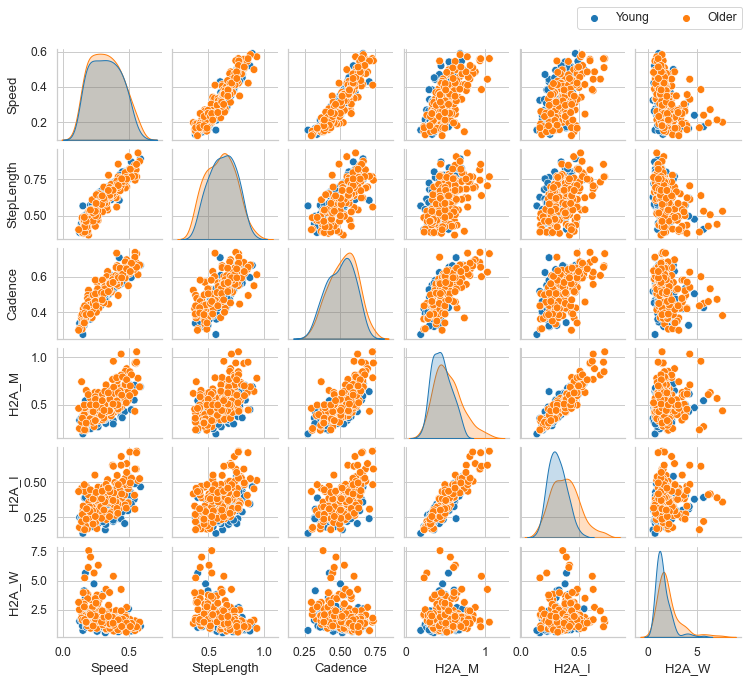

In [12]:
grid = sns.pairplot(df, vars=['Speed', 'StepLength', 'Cadence', 'H2A_M', 'H2A_I', 'H2A_W'],
                    diag_kind='auto', hue='AgeGroup', plot_kws={'s':60},
                    height=1.6, aspect=1)
handles = grid._legend_data.values()
labels = grid._legend_data.keys()
grid._legend.remove()
grid.fig.legend(handles=handles, labels=labels, loc='upper right', ncol=2,
             bbox_to_anchor=(1, 1.02), bbox_transform=plt.gcf().transFigure)
grid.fig.subplots_adjust(left=.1, right=.99, bottom = 0.1, top=.95, hspace=.1, wspace=.1)
grid.fig.align_ylabels(grid.axes[:, 0])
plt.show()

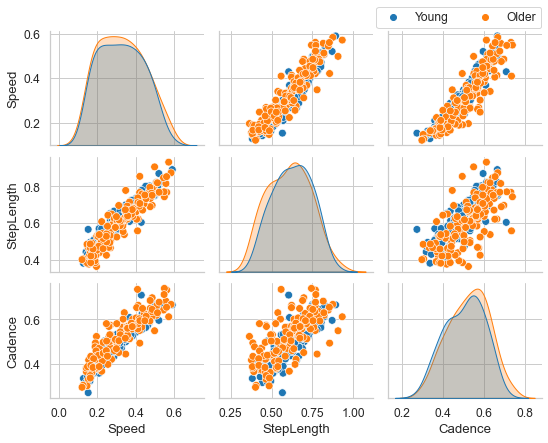

In [13]:
grid = sns.pairplot(df, vars=['Speed', 'StepLength', 'Cadence'],
                    diag_kind='auto', hue='AgeGroup', plot_kws={'s':60},
                    height=2, aspect=1.1)
handles = grid._legend_data.values()
labels = grid._legend_data.keys()
grid._legend.remove()
grid.fig.legend(handles=handles, labels=labels, loc='upper right', ncol=2,
             bbox_to_anchor=(1, 1.02), bbox_transform=plt.gcf().transFigure)
grid.fig.subplots_adjust(left=.1, right=.99, bottom = 0.1, top=.95, hspace=.1, wspace=.1)
grid.fig.align_ylabels(grid.axes[:, 0])
plt.show()

## Linear regression models

> Predictors: Age, Speed,  StepLength, Cadence  
> Responses: H2A_M, H2A_I, H2A_W

In [14]:
def plots(df, x, y, order):
    """Scatter and line plots
    """
    grid = sns.lmplot(x=x, y=y[0], data=df, order=order, col='AgeGroup', hue='AgeGroup',
                      ci=None, robust=False, scatter_kws={'alpha':.5}, line_kws={'alpha':.5},
                      facet_kws={'sharex':True, 'sharey':True}, fit_reg=True, legend=False, 
                      height=3, aspect=1.5)
    grid.set(xticklabels=[])
    grid.set_xlabels('')
    plt.show()
    grid = sns.lmplot(x=x, y=y[1], data=df, order=order, col='AgeGroup', hue='AgeGroup',
                      ci=None, robust=False, scatter_kws={'alpha':.5}, line_kws={'alpha':.5},
                      facet_kws={'sharex':True, 'sharey':True}, fit_reg=True, legend=False, 
                      height=3, aspect=1.5)
    grid.set(xticklabels=[])
    grid.set_xlabels('')
    grid.set_titles(col_template='')
    plt.show()
    grid = sns.lmplot(x=x, y=y[2], data=df, order=order, col='AgeGroup', hue='AgeGroup',
                      ci=None, robust=False, scatter_kws={'alpha':.5}, line_kws={'alpha':.5},
                      facet_kws={'sharex':True, 'sharey':True}, fit_reg=True, legend=False, 
                      height=3, aspect=1.5)
    grid.set_titles(col_template='')
    plt.show()

### Speed

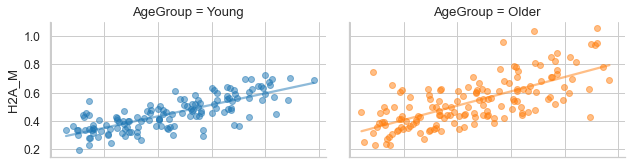

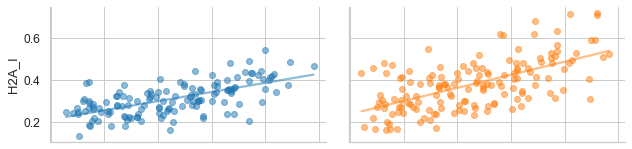

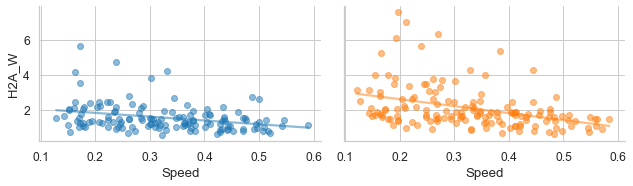

In [15]:
plots(df, x='Speed', y=['H2A_M','H2A_I','H2A_W'], order=1)

### StepLength

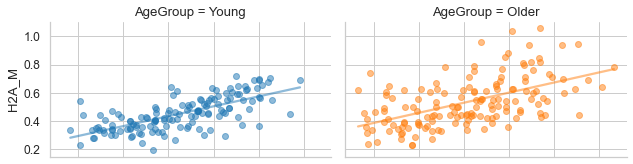

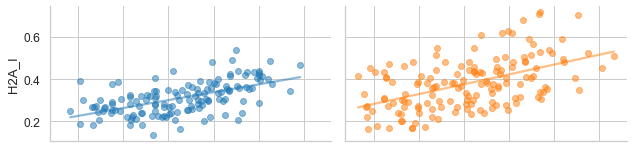

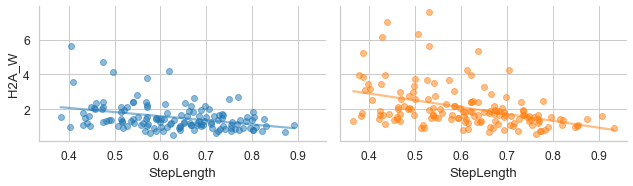

In [16]:
plots(df, x='StepLength', y=['H2A_M','H2A_I','H2A_W'], order=1)

### Cadence

A parabola (quadratic polynomial) captures better the relation between variables Speed and Cadence:

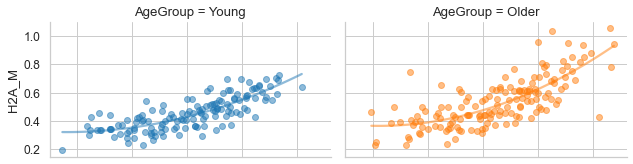

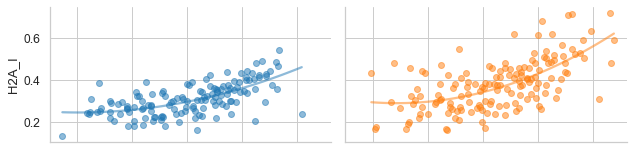

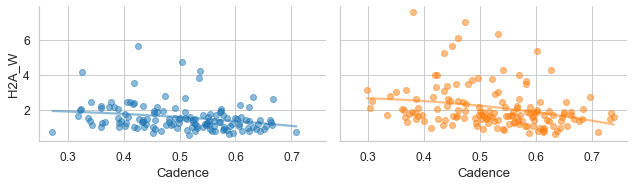

In [17]:
plots(df, x='Cadence', y=['H2A_M','H2A_I','H2A_W'], order=2)

### A linear mixed-effects regression model

Linear mixed-effects regression models were employed to examine the effects of factors age and speed on the responses step length and cadence.   
We will fit models that express the mean value across subjects of the response as a linear function of age and speed (separately, added, and multiplied) with a random intercept and fixed slope for each subject. Such models are necessary because each subject walked at six different speeds with respect to his/her own comfortable speed (and because each subject had a different comfortable speed, the speed values varied continuously across all subjects).  
Accordingly, the following equation is the most general model to be used:

$$
\text{Response} = \beta_0 + \beta_A \text{AgeGroup} + \beta_S \text{Speed} + \beta_{S2} \text{Speed}\,^2 + \beta_{AS} \text{AgeGroup} \times \text{Speed}  + (1 | \text{Subject}) + \epsilon
$$

Where $(1|\text{Subject})$ is a random intercept for each subject, and $\epsilon$ is a residual error.

### Data standardization

As our intent for the use of linear regression is inferential, the outcome variable and the variable Speed can be standardized (each variable was transformed to mean = 0 and standard deviation = 1). In this way, the standardized regression coefficients of the fixed factors can be used as an effect size measure, and a value not significantly different from zero (or with a confidence interval containing the value 0) supports the null hypothesis that there is no association between the predictor variable and the response variable.  
This step has no effect on the final results of the regressions.

In [18]:
df_nd_ns = df.copy(deep=True)  # save non-standardized data
var = ['Height', 'Mass', 'BMI', 'LegLength', 'SpeedComf', 'Speed', 
       'StepLength', 'Cadence', 'H2A_M', 'H2A_I', 'H2A_W']
# standardization (mean 0, variance 1)
stdz = lambda x: (x-x.mean())/x.std()
df[var] = df[var].apply(lambda x: stdz(x), axis=0)
# un-standardization
def unstdz(dfs, dfns, var=None):
    """Un-standardize a unstandardized dataframe.
    """
    if var is None:
         var = dfs.columns
    for v in var:
        dfs[v] =  dfs[v] * dfns[v].std() + dfns[v].mean()
    return dfs

#### Replace letters by numeric values because it's easier to identify the effect  
E.g.: {'Y': 0, 'O': 1} implies that if there is an effect of Age and its coefficient (slope) is positive, it means that the response increases for older subjects and decreases for young subjects. Internally the letters were replaced by numbers anyway but we didn't know the order.

In [19]:
df.loc[:, 'AgeGroup'].replace({'Young': 0, 'Older': 1}, inplace=True)

### Run regression models

In [20]:
# https://stackoverflow.com/questions/31978948/python-stats-models-quadratic-term-in-regression
df['Cadence2'] = df['Cadence']**2

features = ['H2A_M', 'H2A_I', 'H2A_W']
labels   = ['H2A_M', 'H2A_I', 'H2A_W']

predictors = ['C(AgeGroup)',
              'StepLength',
              'Cadence + Cadence2',
              'Speed',
              'C(AgeGroup) + StepLength',
              'C(AgeGroup) + Cadence + Cadence2',
              'C(AgeGroup) + Speed',
              'C(AgeGroup) + StepLength + Cadence + Cadence2',
              'StepLength + Cadence + Cadence2',
              'StepLength + Speed',
              'Cadence + Cadence2 + Speed',
              'StepLength + Cadence + Cadence2 + Speed',
              'C(AgeGroup) + StepLength + Cadence + Cadence2 + Speed'
             ]
groups = df['Subject']

names = ['C(AgeGroup)[T.1]', 'StepLength', 'Cadence', 'Cadence2', 'Speed']
models, fit_ml, fit_re = runmodels(df, predictors, features, groups=groups, names=names)

Running regression models...
H2A_M C(AgeGroup)
Model  0: H2A_M ~ C(AgeGroup) converged.
H2A_M StepLength
Model  1: H2A_M ~ StepLength converged.
H2A_M Cadence + Cadence2
Model  2: H2A_M ~ Cadence + Cadence2 converged.
H2A_M Speed
Model  3: H2A_M ~ Speed converged.
H2A_M C(AgeGroup) + StepLength
Model  4: H2A_M ~ C(AgeGroup) + StepLength converged.
H2A_M C(AgeGroup) + Cadence + Cadence2
Model  5: H2A_M ~ C(AgeGroup) + Cadence + Cadence2 converged.
H2A_M C(AgeGroup) + Speed
Model  6: H2A_M ~ C(AgeGroup) + Speed converged.
H2A_M C(AgeGroup) + StepLength + Cadence + Cadence2
Model  7: H2A_M ~ C(AgeGroup) + StepLength + Cadence + Cadence2 converged.
H2A_M StepLength + Cadence + Cadence2
Model  8: H2A_M ~ StepLength + Cadence + Cadence2 converged.
H2A_M StepLength + Speed
Model  9: H2A_M ~ StepLength + Speed converged.
H2A_M Cadence + Cadence2 + Speed
Model 10: H2A_M ~ Cadence + Cadence2 + Speed converged.
H2A_M StepLength + Cadence + Cadence2 + Speed
Model 11: H2A_M ~ StepLength + Cadence +

####  Table with model results

In [21]:
names2 = [['Age'], ['StepLength'], ['Cadence'], ['Cadence $\mathbf{^2}$'], ['Speed']]
display_table(models, names2, filename='h2a_age_speed_nd.csv')

### Confidence intervals for the mean by bootstrap

In [22]:
def ci_boot(dfn, var, var2):
    """Confidence intervals for the mean by bootstrap
    """
    # create data with speed values to predict var
    speed = np.r_[np.linspace(df[df['AgeGroup']==0]['Speed'].min(),
                              df[df['AgeGroup']==0]['Speed'].max(), num=100),
                  np.linspace(df[df['AgeGroup']==1]['Speed'].min(),
                              df[df['AgeGroup']==1]['Speed'].max(), num=100)]
    agegroup = np.r_[np.zeros(100), np.ones(100)]
    df3 = pd.DataFrame({'Speed': speed, 'AgeGroup': agegroup})

    # bootstrap regression data 
    y = bootstrap(df[['Subject', 'AgeGroup', 'Speed', var]], df3,
                  var, 'Speed + C(AgeGroup)', 'Subject', n_boots=n_boots)

    # create data with bootstrapped parameters
    df4 = pd.DataFrame({'AgeGroup': agegroup,
                        'Speed': speed,
                        var: np.percentile(y, 50, axis=1),
                        'pinf': np.percentile(y, 100*alpha/2, axis=1),
                        'psup': np.percentile(y, 100*(1-alpha/2), axis=1)})

    # un-standardize data
    df4['Speed'] = df4['Speed'] * dfn['Speed'].std() + dfn['Speed'].mean()
    df4[var] = df4[var] * dfn[var].std() + dfn[var].mean()
    df4['pinf'] = df4['pinf'] * dfn[var].std() + dfn[var].mean()
    df4['psup'] = df4['psup'] * dfn[var].std() + dfn[var].mean()

    # Values at comfortable speed
    speed_comf = (dfn['SpeedComf'].mean() - dfn['Speed'].mean()) / dfn['Speed'].std()
    var_comf = np.array([np.dot(fit_re[2].fe_params, [1, 0, speed_comf]),
                         np.dot(fit_re[2].fe_params, [1, 1, speed_comf])])
    speed_comf = speed_comf * dfn['Speed'].std() + dfn['Speed'].mean()
    var_comf = var_comf * dfn[var].std() + dfn[var].mean()
    var_diff_comf = 100 * (var_comf[1] - var_comf[0]) / var_comf[0]
    print('{} difference at comfortable speed ({:.2f}): {:.2f}%'.format(var, speed_comf, var_diff_comf))

    # store data
    data_dict[var2] = (dfn, df4, speed_comf, var_comf, var_diff_comf)    
    return data_dict

In [23]:
data_dict = ci_boot(df_nd_ns, 'H2A_M', 'h2a_m_nd')
data_dict = ci_boot(df_nd_ns, 'H2A_I', 'h2a_i_nd')
data_dict = ci_boot(df_nd_ns, 'H2A_W', 'h2a_w_nd')

  0%|          | 0/1000 [00:00<?, ?it/s]

H2A_M difference at comfortable speed (0.42): 22.77%


  0%|          | 0/1000 [00:00<?, ?it/s]

H2A_I difference at comfortable speed (0.42): 22.60%


  0%|          | 0/1000 [00:00<?, ?it/s]

H2A_W difference at comfortable speed (0.42): 43.60%


### Results are similar with dimensional data

In [24]:
df = df_d.copy(deep=True)
df_d_ns = df.copy(deep=True)
df[var] = df[var].apply(lambda x: stdz(x), axis=0)
df.loc[:, 'AgeGroup'].replace({'Young': 0, 'Older': 1}, inplace=True)

In [25]:
# https://stackoverflow.com/questions/31978948/python-stats-models-quadratic-term-in-regression
df['Cadence2'] = df['Cadence']**2

features = ['H2A_M', 'H2A_I', 'H2A_W']
labels   = ['H2A_M', 'H2A_I', 'H2A_W']

predictors = ['C(AgeGroup)',
              'StepLength',
              'Cadence + Cadence2',
              'Speed',
              'C(AgeGroup) + StepLength',
              'C(AgeGroup) + Cadence + Cadence2',
              'C(AgeGroup) + Speed',
              'C(AgeGroup) + StepLength + Cadence + Cadence2',
              'StepLength + Cadence + Cadence2',
              'StepLength + Speed',
              'Cadence + Cadence2 + Speed',
              'StepLength + Cadence + Cadence2 + Speed',
              'C(AgeGroup) + StepLength + Cadence + Cadence2 + Speed'
             ]
groups = df['Subject']

names = ['C(AgeGroup)[T.1]', 'StepLength', 'Cadence', 'Cadence2', 'Speed']
models, fit_ml, fit_re = runmodels(df, predictors, features, groups=groups, names=names)

Running regression models...
H2A_M C(AgeGroup)
Model  0: H2A_M ~ C(AgeGroup) converged.
H2A_M StepLength
Model  1: H2A_M ~ StepLength converged.
H2A_M Cadence + Cadence2
Model  2: H2A_M ~ Cadence + Cadence2 converged.
H2A_M Speed
Model  3: H2A_M ~ Speed converged.
H2A_M C(AgeGroup) + StepLength
Model  4: H2A_M ~ C(AgeGroup) + StepLength converged.
H2A_M C(AgeGroup) + Cadence + Cadence2
Model  5: H2A_M ~ C(AgeGroup) + Cadence + Cadence2 converged.
H2A_M C(AgeGroup) + Speed
Model  6: H2A_M ~ C(AgeGroup) + Speed converged.
H2A_M C(AgeGroup) + StepLength + Cadence + Cadence2
Model  7: H2A_M ~ C(AgeGroup) + StepLength + Cadence + Cadence2 converged.
H2A_M StepLength + Cadence + Cadence2
Model  8: H2A_M ~ StepLength + Cadence + Cadence2 converged.
H2A_M StepLength + Speed
Model  9: H2A_M ~ StepLength + Speed converged.
H2A_M Cadence + Cadence2 + Speed
Model 10: H2A_M ~ Cadence + Cadence2 + Speed converged.
H2A_M StepLength + Cadence + Cadence2 + Speed
Model 11: H2A_M ~ StepLength + Cadence +

In [26]:
names2 = [['Age'], ['StepLength'], ['Cadence'], ['Cadence $\mathbf{^2}$'], ['Speed']]
display_table(models, names2, filename='h2a_age_speed_d.csv')

In [27]:
data_dict = ci_boot(df_d_ns, 'H2A_M', 'h2a_m_d')
data_dict = ci_boot(df_d_ns, 'H2A_I', 'h2a_i_d')
data_dict = ci_boot(df_d_ns, 'H2A_W', 'h2a_w_d')

  0%|          | 0/1000 [00:00<?, ?it/s]

H2A_M difference at comfortable speed (1.23): 22.16%


  0%|          | 0/1000 [00:00<?, ?it/s]

H2A_I difference at comfortable speed (1.23): 22.00%


  0%|          | 0/1000 [00:00<?, ?it/s]

H2A_W difference at comfortable speed (1.23): 42.40%


## Two-dimensional plots combined: Step Length and Cadence versus Speed

In [28]:
# save data to a file
data_file = open(path2 / 'data2_dict.pkl', 'wb')
pickle.dump(data_dict, data_file)
data_file.close()

In [29]:
# load data
data_file = open(path2 / 'data2_dict.pkl', 'rb')
data_dict = pickle.load(data_file)

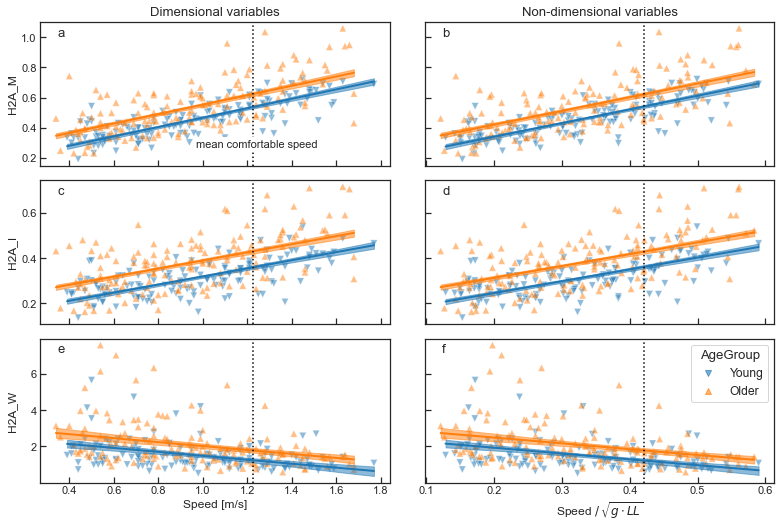

In [30]:
sns.set_style('white', rc={'xtick.bottom': True, 'xtick.top': False, 'ytick.left': True,
                  'ytick.right': False, 'xtick.direction': 'in', 'ytick.direction': 'in'})
fig, axs = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(12, 8))

fs = 12  # fontsize
abcd = ['a', 'b', 'c', 'd', 'e', 'f']

# data_dict keys:
keys = ['h2a_m_d', 'h2a_m_nd', 'h2a_i_d', 'h2a_i_nd', 'h2a_w_d', 'h2a_w_nd']
vrs = ['H2A_M', 'H2A_M', 'H2A_I', 'H2A_I', 'H2A_W', 'H2A_W'] 
xlabels = ['Speed [m/s]', 'Speed $/\,\sqrt{g \cdot LL}$', 'Speed [m/s]',
           'Speed $/\,\sqrt{g \cdot LL}$', 'Speed [m/s]', 'Speed $/\,\sqrt{g \cdot LL}$']
ylabels = ['H2A_M', 'H2A_M', 'H2A_I', 'H2A_I', 'H2A_W', 'H2A_W']

axs = axs.flatten()
for i, ax in enumerate(axs):
    df4 = data_dict[keys[i]][1]
    sns.scatterplot(x='Speed', y=vrs[i], data=data_dict[keys[i]][0], hue='AgeGroup', 
                    style='AgeGroup', ci=None, markers=['v', '^'], alpha=.5,
                    s=50, ax=ax)        
    ax.fill_between(df4[df4['AgeGroup']==0]['Speed'],
                    df4[df4['AgeGroup']==0]['pinf'], df4[df4['AgeGroup']==0]['psup'],
                    color=sns.color_palette()[0], alpha=.5)
    ax.fill_between(df4[df4['AgeGroup']==1]['Speed'],
                    df4[df4['AgeGroup']==1]['pinf'], df4[df4['AgeGroup']==1]['psup'],
                    color=sns.color_palette()[1], alpha=.5)
    sns.lineplot(x='Speed', y=vrs[i], data=df4, hue='AgeGroup', 
                 ci=None, alpha=1, legend=False, lw=2, ax=ax)
    ax.axvline(data_dict[keys[i]][2], c='k', ls=':')
    ax.tick_params(axis='both', labelsize=fs-1)
    ax.set_xlabel(xlabels[i], fontsize=fs)
    ax.set_ylabel(ylabels[i], fontsize=fs)
    ax.text(0.05, .9, abcd[i], fontsize=fs+1, transform=ax.transAxes)

axs[0].set_title('Dimensional variables')
axs[1].set_title('Non-dimensional variables')
axs[0].legend(title='AgeGroup', fontsize=fs-1, loc='lower right', frameon=False)
for lh in axs[-1].get_legend().legendHandles: 
    lh.set_alpha(.6)
    #lh._sizes = [40] 
[axs[i].get_legend().remove() for i in range(0, len(axs)-1)]
text = 'mean comfortable speed'
axs[0].text(.62, .15, text, fontsize=fs-1, ha='center', va='center',
            bbox={'facecolor':'white', 'alpha':1, 'edgecolor':'none', 'pad':2},
            transform=axs[0].transAxes)
fig.align_labels() 
plt.subplots_adjust(left=.1, bottom=.1, right=.95, top=.9, wspace=.1, hspace=.1)
fig.savefig(path2 / 'regressions__H2A.png', dpi=600)
fig.savefig(path2 / 'regressions__H2A.svg', dpi=600)
plt.show()

Figure. Hip-to-Ankle ratio for the following features of the joint moments: peak (H2A_M), impulse (H2A_I), and work (H2A_W) versus Speed of young (N=23) and older (N=25) subjects, each subject walking at six different speeds. Plots are shown for both dimensional and non-dimensional variables. Linear regression models (± 95% confidence intervals) are fitted for the features versus Speed data. g: acceleration of gravity, LL: leg length.

## Three-dimensional plots: Step Length and Speed versus H2A features

In [31]:
# add plane: https://memotut.com/en/e42c726cdee25767105d/

fig = px.scatter_3d(df_nd_ns, x='StepLength', y='Speed', z='H2A_M', color='AgeGroup')
fig.update_traces(marker=dict(size=5), selector=dict(mode='markers'))
camera = dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=1, y=-2, z=0.5))
fig.update_layout(scene_camera=camera)
fig.show()

fig = px.scatter_3d(df_nd_ns, x='StepLength', y='Speed', z='H2A_I', color='AgeGroup')
fig.update_traces(marker=dict(size=5), selector=dict(mode='markers'))
camera = dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=1, y=-2, z=0.5))
fig.update_layout(scene_camera=camera)
fig.show()

fig = px.scatter_3d(df_nd_ns, x='StepLength', y='Speed', z='H2A_W', color='AgeGroup')
fig.update_traces(marker=dict(size=5), selector=dict(mode='markers'))
camera = dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=1, y=-2, z=0.5))
fig.update_layout(scene_camera=camera)
fig.show()

## References
 - Fukuchi CA, Fukuchi RK, Duarte M (2018) A public dataset of overground and treadmill walking kinematics and kinetics in healthy individuals. PeerJ 6:e4640; DOI 10.7717/peerj.4640.  